# Data ingestion

In [65]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [67]:
os.getcwd()

'/Users/nathabit/Desktop/applied_discount_code_analysis/applied_discount_analysis/notebooks'

In [5]:
path=os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/raw_data.csv'))
coupon_data = pd.read_csv(path)

In [6]:
coupon_data.shape

(2841074, 47)

In [7]:
coupon_data.sample(3)

,id,discount_code,applied_count,failed,failed_reason,created_at,updated_at,cart_id,checkout_id,token,subtotal_price,total_price,order_name,is_payment_online,verified_cart,final_subtotal_price,final_total_price,cart_state,final_discount,final_shipping,outstation,online_payment_attempted,utm_source,is_fast_checkout,recommended_discount_id,temp_discount,discount_reason,additional_off,additional_off_type,eligible_nat_cash,discount_amount,discount_type,payment_charge,promotion_discount_amount,recommend_discount_code,min_amount,is_active,suggestion_amount_window,show_only_on_checkout,background_color,image_url,show_on_new_website,recommendation_tag,mrp_total,mrp_items_total,show_on_only_promotion_qty,show_on_app
549050,1767914,FRESH35,14,False,NaN,2024-06-18 15:42:47.026309+00:00,2024-07-02 07:43:22.226481+00:00,25845084,NaN,efLtUnMkRz61kokITj9i,0.0,0.0,NaN,False,False,0.0,0.0,Created,0.0,0.0,False,False,google,False,NaN,0.0,FRESH35,0.0,NaN,0.0,455.35,percentage,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845.65,1301.0,NaN,NaN
216859,1435723,FREECOMBO,2,False,NaN,2024-05-01 10:58:38.450480+00:00,2024-05-01 10:58:38.841955+00:00,25843379,NaN,nIKHB2aChotM0xF3dKIk,0.0,0.0,NaN,False,False,0.0,0.0,Created,0.0,0.0,False,False,facebook,False,NaN,0.0,NHBDAY50,0.0,NaN,0.0,671.20,percentage,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.80,1476.0,NaN,NaN
608694,1827558,MONSOON50,6,False,NaN,2024-06-28 05:48:48.199956+00:00,2024-08-24 23:33:13.927192+00:00,27491137,NaN,oDI9dRLywi4oXoXZYLry,0.0,0.0,NaN,False,False,0.0,0.0,Created,0.0,0.0,False,False,facebook,False,NaN,0.0,FREECOMBO,0.0,NaN,0.0,1433.00,percentage,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1424.00,2857.0,NaN,NaN


In [8]:
#visualizing all the columns in the dataset
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [9]:
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 47 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   discount_code               object 
 2   applied_count               int64  
 3   failed                      bool   
 4   failed_reason               object 
 5   created_at                  object 
 6   updated_at                  object 
 7   cart_id                     int64  
 8   checkout_id                 float64
 9   token                       object 
 10  subtotal_price              float64
 11  total_price                 float64
 12  order_name                  object 
 13  is_payment_online           bool   
 14  verified_cart               bool   
 15  final_subtotal_price        float64
 16  final_total_price           float64
 17  cart_state                  object 
 18  final_discount              float64
 19  final_shipping       

In [10]:
coupon_data.isna().mean()

id                            0.000000
discount_code                 0.000458
applied_count                 0.000000
failed                        0.000000
failed_reason                 0.799793
created_at                    0.000000
updated_at                    0.000000
cart_id                       0.000000
checkout_id                   0.699641
token                         0.000000
subtotal_price                0.000000
total_price                   0.000000
order_name                    0.362117
is_payment_online             0.000000
verified_cart                 0.000000
final_subtotal_price          0.000000
final_total_price             0.000000
cart_state                    0.000000
final_discount                0.000000
final_shipping                0.000000
outstation                    0.000000
online_payment_attempted      0.000000
utm_source                    0.117507
is_fast_checkout              0.000000
recommended_discount_id       0.999988
temp_discount            

#### Feauture extraction for analysis

In [11]:
# Feature selected for further analysis and assinged them a data frame name df
df = coupon_data[['id', 'discount_code','discount_reason', 'applied_count',
                   'failed', 'failed_reason','created_at', 'updated_at', 
                   'cart_id','cart_state','discount_amount','discount_type',
                   'mrp_total','mrp_items_total']]

In [12]:
#null values count
df.isnull().mean()

id                 0.000000
discount_code      0.000458
discount_reason    0.170294
applied_count      0.000000
failed             0.000000
failed_reason      0.799793
created_at         0.000000
updated_at         0.000000
cart_id            0.000000
cart_state         0.000000
discount_amount    0.000002
discount_type      0.172098
mrp_total          0.000002
mrp_items_total    0.000002
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   discount_code    object 
 2   discount_reason  object 
 3   applied_count    int64  
 4   failed           bool   
 5   failed_reason    object 
 6   created_at       object 
 7   updated_at       object 
 8   cart_id          int64  
 9   cart_state       object 
 10  discount_amount  float64
 11  discount_type    object 
 12  mrp_total        float64
 13  mrp_items_total  float64
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 284.5+ MB


1) datetime columns needed to be changed

In [14]:
#examining the duplicate value in the given dataset
df.duplicated().sum()

np.int64(0)

In [15]:
round(df[['applied_count','discount_amount','mrp_total','mrp_items_total']].describe(),3)

,applied_count,discount_amount,mrp_total,mrp_items_total
count,2841074.000,2841068.000,2841068.000,2841068.000
mean,4.963,732.418,875.936,1629.650
std,9.575,1373.149,2800.305,4138.413
min,1.000,-393.000,0.000,0.000
25%,2.000,428.400,569.000,1043.000
50%,3.000,603.000,709.800,1343.000
75%,5.000,849.600,1026.000,1929.000
max,3903.000,2066116.000,4591897.000,6658013.000


In [16]:
# num_columns = ['applied_count','discount_amount','mrp_total','mrp_items_total']

In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# num_columns = ['applied_count', 'discount_amount', 'mrp_total', 'mrp_items_total']

# for col in num_columns:
#     print(f'Box plot for {col}:')
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=df[col])
#     plt.title(f'Box Plot of {col}')
#     plt.xlabel(col)
#     plt.show()

In [18]:
df.shape

(2841074, 14)

In [19]:
import pandas as pd

num_columns = ['applied_count', 'discount_amount', 'mrp_total', 'mrp_items_total']
outlier_data = []

for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.75 * IQR
    upper_bound = Q3 + 0.75 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_data.append({
        'Column': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': outliers.shape[0]
    })

# Create summary DataFrame
outlier_summary = pd.DataFrame(outlier_data)
outlier_summary


,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,applied_count,2.0,5.0,3.0,-0.25,7.25,425417
1,discount_amount,428.4,849.6,421.2,112.50,1165.50,527687
2,mrp_total,569.0,1026.0,457.0,226.25,1368.75,449013
3,mrp_items_total,1043.0,1929.0,886.0,378.50,2593.50,458556


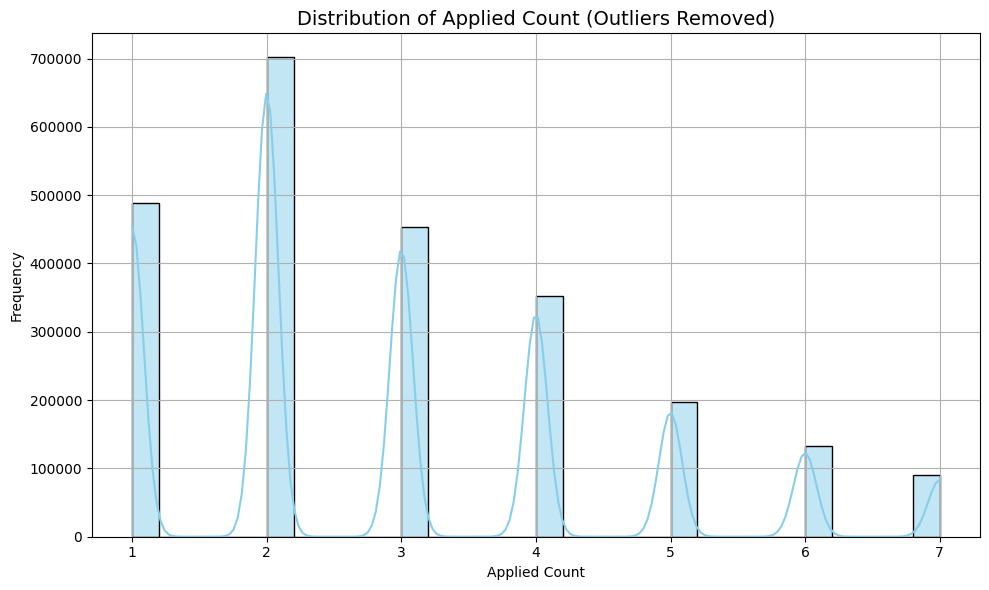

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate IQR for applied_count
Q1 = df['applied_count'].quantile(0.25)
Q3 = df['applied_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.75 * IQR
upper_bound = Q3 + 0.75 * IQR

# Remove outliers from applied_count
df_no_outliers = df[(df['applied_count'] >= lower_bound) & (df['applied_count'] <= upper_bound)]

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['applied_count'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Applied Count (Outliers Removed)', fontsize=14)
plt.xlabel('Applied Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df['created_at'].nunique()

2841069

In [22]:
# Ensure order_date is datetime format
df['created_at'] = pd.to_datetime(df['created_at'],errors='coerce')

In [23]:
# Ensure order_date is datetime format
df['updated_at'] = pd.to_datetime(df['updated_at'],errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 14 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               int64              
 1   discount_code    object             
 2   discount_reason  object             
 3   applied_count    int64              
 4   failed           bool               
 5   failed_reason    object             
 6   created_at       datetime64[ns, UTC]
 7   updated_at       datetime64[ns, UTC]
 8   cart_id          int64              
 9   cart_state       object             
 10  discount_amount  float64            
 11  discount_type    object             
 12  mrp_total        float64            
 13  mrp_items_total  float64            
dtypes: bool(1), datetime64[ns, UTC](2), float64(3), int64(3), object(5)
memory usage: 284.5+ MB


In [25]:
df['created_date']= df['created_at'].dt.date
df['updated_date']= df['updated_at'].dt.date

In [26]:
df['created_date'].nunique()

382

In [27]:
df['created_time'] = df['created_at'].dt.time

In [28]:
df['updated_time'] = df['updated_at'].dt.time

In [29]:
df.sample()

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time
538731,1757595,FREECOMBO,FREECOMBO,18,False,NaN,2024-06-17 05:15:29.838299+00:00,2024-06-17 05:20:10.521823+00:00,27208144,orderPlaced,1559.0,percentage,1639.0,3198.0,2024-06-17,2024-06-17,05:15:29.838299,05:20:10.521823


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 18 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               int64              
 1   discount_code    object             
 2   discount_reason  object             
 3   applied_count    int64              
 4   failed           bool               
 5   failed_reason    object             
 6   created_at       datetime64[ns, UTC]
 7   updated_at       datetime64[ns, UTC]
 8   cart_id          int64              
 9   cart_state       object             
 10  discount_amount  float64            
 11  discount_type    object             
 12  mrp_total        float64            
 13  mrp_items_total  float64            
 14  created_date     object             
 15  updated_date     object             
 16  created_time     object             
 17  updated_time     object             
dtypes: bool(1), datetime64[ns, UTC](2), float6

In [31]:
df['time_spent'] = df['updated_at']- df['created_at']

In [32]:
df.sample()

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent
2750368,3969264,NHBDAY50,NHBDAY50,19,False,NaN,2025-04-09 11:09:18.305753+00:00,2025-04-12 17:42:12.187285+00:00,34989340,Created,1374.0,percentage,1374.0,2748.0,2025-04-09,2025-04-12,11:09:18.305753,17:42:12.187285,3 days 06:32:53.881532


In [33]:
df['failed_reason'].value_counts().head(10)

failed_reason
You are not eligible for this discount                         110813
Discount code is valid for a minimum ₹699.0 cart value only     92040
Discount code is valid for a minimum ₹799.0 cart value only     57635
Discount code is valid for a minimum ₹699 cart value only       48551
Invalid discount code                                           37485
Discount code is valid for a minimum ₹599.0 cart value only     36350
Discount Code is not active                                     32624
Discount code has already been used                             22483
Discount Code is not applicable on above products               21988
Discount code is valid for a minimum ₹499.0 cart value only     20968
Name: count, dtype: int64

In [34]:
# Extract year and month
df['year_month'] = df['created_at'].dt.to_period('M')

# Group by month and coupon_code, count usage
monthly_failure_reason = (
    df.groupby(['year_month', 'failed_reason'])
    .size()
    .reset_index(name='usage_count')
)

# Sort by month and count
monthly_failure_reason = monthly_failure_reason.sort_values(['year_month', 'usage_count'], ascending=[True, False])

# Get top 10 coupons per month
top_10_failure_reason = (
    monthly_failure_reason
    .groupby('year_month')
    .head(10)
)

In [35]:
top_10_failure_reason

,year_month,failed_reason,usage_count
7,2024-03,Discount code is valid for a minimum ₹599 cart...,16
12,2024-03,You are not eligible for this discount,15
6,2024-03,Discount code is valid for a minimum ₹499 cart...,11
11,2024-03,Invalid discount code,11
5,2024-03,Discount code is valid for a minimum ₹1999 car...,5
2,2024-03,Discount code has already been used,4
8,2024-03,Discount code is valid for a minimum ₹699 cart...,4
9,2024-03,Discount code is valid for a minimum ₹799.0 ca...,4
1,2024-03,Discount Code is not applicable on above products,3
3,2024-03,Discount code is valid for a minimum ₹1099 car...,2


#### cart state analysis

In [36]:
df['cart_state'].value_counts()

cart_state
orderPlaced    1698293
Created        1142781
Name: count, dtype: int64

In [37]:
df[df['cart_state']=='Created'].head(5)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
3,1218867,NEWHABIT50,NEWHABIT50,2,False,NaN,2024-03-31 18:31:18.890836+00:00,2024-03-31 18:33:15.733363+00:00,24828015,Created,975.4,percentage,1261.6,2237.0,2024-03-31,2024-03-31,18:31:18.890836,18:33:15.733363,0 days 00:01:56.842527,2024-03
5,1218869,FRESH35,NaN,5,False,NaN,2024-03-31 18:31:23.255674+00:00,2024-03-31 18:33:11.326374+00:00,24828375,Created,120.0,NaN,342.0,462.0,2024-03-31,2024-03-31,18:31:23.255674,18:33:11.326374,0 days 00:01:48.070700,2024-03
6,1218870,NEWHABIT50,NaN,7,True,Discount code is valid for a minimum ₹599 cart...,2024-03-31 18:31:38.295608+00:00,2024-03-31 18:33:42.788587+00:00,24589939,Created,170.0,NaN,427.0,597.0,2024-03-31,2024-03-31,18:31:38.295608,18:33:42.788587,0 days 00:02:04.492979,2024-03
8,1218872,FREESPA,NaN,4,True,Discount code is valid for a minimum ₹599 cart...,2024-03-31 18:31:51.412035+00:00,2024-03-31 18:32:19.549570+00:00,24828409,Created,120.0,NaN,342.0,462.0,2024-03-31,2024-03-31,18:31:51.412035,18:32:19.549570,0 days 00:00:28.137535,2024-03
12,1218876,FRESH35,NaN,3,False,NaN,2024-03-31 18:32:25.205579+00:00,2024-03-31 18:33:44.329634+00:00,24828339,Created,604.0,NaN,934.0,1538.0,2024-03-31,2024-03-31,18:32:25.205579,18:33:44.329634,0 days 00:01:19.124055,2024-03


In [38]:
df[df['cart_state']=='orderPlaced'].sample(5)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
121260,1340124,NEWHABIT50,NEWHABIT50,1,False,NaN,2024-04-21 08:12:02.764116+00:00,2024-04-21 08:12:02.764133+00:00,25475924,orderPlaced,677.19,percentage,1352.81,2030.0,2024-04-21,2024-04-21,08:12:02.764116,08:12:02.764133,0 days 00:00:00.000017,2024-04
2838004,4056900,NEWHABIT50,NEWHABIT50,1,False,NaN,2025-04-15 19:07:48.845360+00:00,2025-04-15 19:07:48.845371+00:00,38333680,orderPlaced,796.79,percentage,1143.21,1940.0,2025-04-15,2025-04-15,19:07:48.845360,19:07:48.845371,0 days 00:00:00.000011,2025-04
1835285,3054181,FREEHANDMALAI,FREEHANDMALAI,3,False,NaN,2024-12-17 06:16:00.677031+00:00,2024-12-17 06:16:27.683155+00:00,33619345,orderPlaced,603.00,percentage,809.00,1412.0,2024-12-17,2024-12-17,06:16:00.677031,06:16:27.683155,0 days 00:00:27.006124,2024-12
1967730,3186626,NY2025,FREECOMBO,2,False,NaN,2025-01-03 13:54:39.096099+00:00,2025-01-03 13:54:40.027524+00:00,33253911,orderPlaced,1277.00,percentage,1043.00,2320.0,2025-01-03,2025-01-03,13:54:39.096099,13:54:40.027524,0 days 00:00:00.931425,2025-01
90046,1308910,10OFFNOW,10OFFNOW,3,False,NaN,2024-04-16 05:53:23.312599+00:00,2024-04-16 05:53:26.043051+00:00,24675758,orderPlaced,889.69,percentage,1392.31,2282.0,2024-04-16,2024-04-16,05:53:23.312599,05:53:26.043051,0 days 00:00:02.730452,2024-04


In [39]:
order_placed=df[df['cart_state']=='orderPlaced']

In [40]:
df[df['cart_id']==24828015]

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
3,1218867,NEWHABIT50,NEWHABIT50,2,False,NaN,2024-03-31 18:31:18.890836+00:00,2024-03-31 18:33:15.733363+00:00,24828015,Created,975.4,percentage,1261.6,2237.0,2024-03-31,2024-03-31,18:31:18.890836,18:33:15.733363,0 days 00:01:56.842527,2024-03
37539,1256403,NEWHABIT50,NEWHABIT50,2,False,NaN,2024-04-07 03:55:10.244401+00:00,2024-04-07 03:55:10.545903+00:00,24828015,Created,975.4,percentage,1261.6,2237.0,2024-04-07,2024-04-07,03:55:10.244401,03:55:10.545903,0 days 00:00:00.301502,2024-04
45799,1264663,NEWHABIT50,NEWHABIT50,1,False,NaN,2024-04-08 06:46:08.812433+00:00,2024-04-08 06:46:08.812446+00:00,24828015,Created,975.4,percentage,1261.6,2237.0,2024-04-08,2024-04-08,06:46:08.812433,06:46:08.812446,0 days 00:00:00.000013,2024-04


In [41]:
order_placed[order_placed['cart_id']==24828015]

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month


In [42]:
df.columns

Index(['id', 'discount_code', 'discount_reason', 'applied_count', 'failed',
       'failed_reason', 'created_at', 'updated_at', 'cart_id', 'cart_state',
       'discount_amount', 'discount_type', 'mrp_total', 'mrp_items_total',
       'created_date', 'updated_date', 'created_time', 'updated_time',
       'time_spent', 'year_month'],
      dtype='object')

In [43]:
filtered_df = df[(df['cart_state'] == 'Created') & (df['discount_reason'].notnull())]

In [44]:
filtered_df.shape

(760839, 20)

In [45]:
# data validation issue needs to discuss
filtered_df['year_month'].value_counts().sort_index()

year_month
2024-03      155
2024-04    53316
2024-05    55947
2024-06    54766
2024-07    65823
2024-08    71236
2024-09    50715
2024-10    53857
2024-11    57834
2024-12    53885
2025-01    75596
2025-02    51713
2025-03    65690
2025-04    50304
Freq: M, Name: count, dtype: int64

In [46]:
filtered_df.sample(5)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
1071572,2290436,MONSOON50,MONSOON50,4,False,NaN,2024-08-24 13:17:48.031388+00:00,2024-08-24 13:18:29.589695+00:00,29490554,Created,884.5,percentage,884.5,1769.0,2024-08-24,2024-08-24,13:17:48.031388,13:18:29.589695,0 days 00:00:41.558307,2024-08
1276933,2495797,FREECOMBO,NEWHABIT50,1,False,NaN,2024-09-25 06:27:00.566808+00:00,2024-09-25 06:27:00.566823+00:00,29727472,Created,461.0,percentage,678.0,1214.0,2024-09-25,2024-09-25,06:27:00.566808,06:27:00.566823,0 days 00:00:00.000015,2024-09
2769175,3988071,FREEHANDMALAI,FREEHANDMALAI,2,False,NaN,2025-04-10 10:06:31.326949+00:00,2025-04-10 10:06:46.644864+00:00,38081796,Created,631.0,percentage,817.0,1448.0,2025-04-10,2025-04-10,10:06:31.326949,10:06:46.644864,0 days 00:00:15.317915,2025-04
544168,1763032,FRESH35,FREESPA,3,True,Discount code is valid for a minimum ₹699 cart...,2024-06-18 00:35:16.529273+00:00,2024-06-18 00:36:01.929784+00:00,27280144,Created,749.0,percentage,605.0,1354.0,2024-06-18,2024-06-18,00:35:16.529273,00:36:01.929784,0 days 00:00:45.400511,2024-06
1228090,2446954,NEWHABIT50,NEWHABIT50,11,False,NaN,2024-09-17 17:01:50.170906+00:00,2024-09-17 17:07:23.871656+00:00,30213298,Created,731.6,percentage,774.4,1506.0,2024-09-17,2024-09-17,17:01:50.170906,17:07:23.871656,0 days 00:05:33.700750,2024-09


In [47]:
df['cart_state'].value_counts()

cart_state
orderPlaced    1698293
Created        1142781
Name: count, dtype: int64

In [48]:
filtered_df_2 = df[(df['cart_state'] == 'orderPlaced') & (df['discount_reason'].notnull())]

In [49]:
filtered_df_2.sample(5)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
453807,1672671,NEWHABIT50,NEWHABIT50,10,False,NaN,2024-06-04 14:51:57.958134+00:00,2024-06-04 15:43:44.427342+00:00,23854050,orderPlaced,552.2,percentage,926.8,1763.0,2024-06-04,2024-06-04,14:51:57.958134,15:43:44.427342,0 days 00:51:46.469208,2024-06
1770504,2989400,FREECOMBO,FREECOMBO,8,False,NaN,2024-12-07 01:21:47.538196+00:00,2024-12-09 17:59:59.303250+00:00,33280402,orderPlaced,1263.0,percentage,1009.0,2272.0,2024-12-07,2024-12-09,01:21:47.538196,17:59:59.303250,2 days 16:38:11.765054,2024-12
853592,2072456,FREESPA,FREESPA,3,False,NaN,2024-07-28 06:02:46.729310+00:00,2024-07-28 06:02:59.797953+00:00,28551332,orderPlaced,784.0,percentage,658.0,1442.0,2024-07-28,2024-07-28,06:02:46.729310,06:02:59.797953,0 days 00:00:13.068643,2024-07
2485092,3703988,FREEHANDMALAI,FREEHANDMALAI,5,False,NaN,2025-03-07 16:34:09.599239+00:00,2025-03-09 12:56:27.055745+00:00,36611210,orderPlaced,531.0,percentage,630.0,1161.0,2025-03-07,2025-03-09,16:34:09.599239,12:56:27.055745,1 days 20:22:17.456506,2025-03
1471555,2690419,FREECOMBO,FREECOMBO,2,False,NaN,2024-10-25 10:39:42.121976+00:00,2024-10-25 10:39:43.344562+00:00,31589024,orderPlaced,1641.0,percentage,1903.0,3544.0,2024-10-25,2024-10-25,10:39:42.121976,10:39:43.344562,0 days 00:00:01.222586,2024-10


In [50]:
filtered_df_2.shape

(1596418, 20)

In [51]:
order_placed.shape

(1698293, 20)

In [52]:
filtered_df.shape

(760839, 20)

In [53]:
filtered_df_3 = df[(df['cart_state'] == 'orderPlaced') & (df['discount_reason'].isnull())]

In [54]:
filtered_df_3.shape

(101875, 20)

In [55]:
filtered_df_3.sample(10)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
1429375,2648239,FREEHANDMALAI,NaN,3,False,NaN,2024-10-17 01:47:23.237775+00:00,2024-10-17 01:47:45.891987+00:00,28936939,orderPlaced,226.0,NaN,564.0,790.0,2024-10-17,2024-10-17,01:47:23.237775,01:47:45.891987,0 days 00:00:22.654212,2024-10
931040,2149904,FREEDOM50,NaN,1,True,Discount code is valid for a minimum ₹799.0 ca...,2024-08-04 12:57:59.244847+00:00,2024-08-04 12:57:59.244864+00:00,28827667,orderPlaced,120.0,NaN,342.0,462.0,2024-08-04,2024-08-04,12:57:59.244847,12:57:59.244864,0 days 00:00:00.000017,2024-08
775829,1994693,NEWHABIT50,NaN,4,True,You are not eligible for this discount,2024-07-16 08:45:40.226186+00:00,2024-07-16 08:46:34.407666+00:00,27912125,orderPlaced,134.0,NaN,767.0,1287.0,2024-07-16,2024-07-16,08:45:40.226186,08:46:34.407666,0 days 00:00:54.181480,2024-07
1729032,2947928,NEWHABIT50,NaN,19,True,You are not eligible for this discount,2024-11-30 18:30:47.419482+00:00,2024-11-30 18:59:51.513170+00:00,33061794,orderPlaced,998.0,NaN,2356.0,3354.0,2024-11-30,2024-11-30,18:30:47.419482,18:59:51.513170,0 days 00:29:04.093688,2024-11
1509008,2727872,GIFTFORYOU,NaN,1,True,Discount code is valid for a minimum ₹1999 car...,2024-11-01 05:27:25.633642+00:00,2024-11-01 05:27:25.633655+00:00,30666752,orderPlaced,689.0,NaN,1658.0,2347.0,2024-11-01,2024-11-01,05:27:25.633642,05:27:25.633655,0 days 00:00:00.000013,2024-11
111402,1330266,NEWHABIT50,NaN,4,True,Discount code is valid for a minimum ₹699 cart...,2024-04-19 16:22:52.608423+00:00,2024-04-19 16:25:55.583528+00:00,25428427,orderPlaced,218.0,NaN,586.0,804.0,2024-04-19,2024-04-19,16:22:52.608423,16:25:55.583528,0 days 00:03:02.975105,2024-04
2365858,3584754,NEWHABIT50,NaN,1,True,Discount code is valid for a minimum ₹699.0 ca...,2025-02-22 12:19:51.436524+00:00,2025-02-22 12:19:51.436534+00:00,36052557,orderPlaced,142.0,NaN,355.0,497.0,2025-02-22,2025-02-22,12:19:51.436524,12:19:51.436534,0 days 00:00:00.000010,2025-02
106624,1325488,NATHABBIT50,NaN,1,True,Invalid discount code,2024-04-19 01:59:40.973261+00:00,2024-04-19 01:59:40.973274+00:00,25400556,orderPlaced,120.0,NaN,342.0,462.0,2024-04-19,2024-04-19,01:59:40.973261,01:59:40.973274,0 days 00:00:00.000013,2024-04
1006701,2225565,FREECOMBO,NaN,2,False,NaN,2024-08-15 16:48:04.555356+00:00,2024-08-15 16:48:04.909732+00:00,29213282,orderPlaced,207.0,NaN,443.0,650.0,2024-08-15,2024-08-15,16:48:04.555356,16:48:04.909732,0 days 00:00:00.354376,2024-08
2399571,3618467,FREEHANDMALAI,NaN,2,False,NaN,2025-02-27 17:28:24.854102+00:00,2025-02-27 17:29:03.304271+00:00,36239916,orderPlaced,120.0,NaN,349.0,419.0,2025-02-27,2025-02-27,17:28:24.854102,17:29:03.304271,0 days 00:00:38.450169,2025-02


In [56]:
# TOP 10 COUPON CODE RESULTING THE CONVERSION FROM CART TO SALE
df['discount_reason'].value_counts().head(10)

discount_reason
NEWHABIT50       348994
FREESPA          267963
FREEHANDMALAI    212867
FRESH35          202788
FREECOMBO        177797
FREEUBTAN        144600
10OFFNOW          96309
NHBDAY50          87556
MONSOON50         80559
ABFLAT50P         77623
Name: count, dtype: int64

In [57]:
top_10_reasons = df['discount_reason'].value_counts().head(10).index.tolist()

In [58]:
top_coupon_df = df[df['discount_reason'].isin(top_10_reasons)]

In [59]:
top_coupon_df.sample(10)

,id,discount_code,discount_reason,applied_count,failed,failed_reason,created_at,updated_at,cart_id,cart_state,discount_amount,discount_type,mrp_total,mrp_items_total,created_date,updated_date,created_time,updated_time,time_spent,year_month
1569784,2788648,NEWHABIT50,NEWHABIT50,3,False,NaN,2024-11-09 07:55:42.327093+00:00,2024-11-09 07:56:38.161686+00:00,32157798,orderPlaced,504.20,percentage,692.80,1197.0,2024-11-09,2024-11-09,07:55:42.327093,07:56:38.161686,0 days 00:00:55.834593,2024-11
898104,2116968,FREECOMBO,FREECOMBO,9,False,NaN,2024-08-02 07:30:52.125138+00:00,2024-08-02 07:35:29.898426+00:00,28619060,orderPlaced,1326.00,percentage,1127.00,2453.0,2024-08-02,2024-08-02,07:30:52.125138,07:35:29.898426,0 days 00:04:37.773288,2024-08
1707589,2926485,FLAT20,NEWHABIT50,3,False,NaN,2024-11-27 12:05:12.205106+00:00,2024-11-27 12:05:53.890823+00:00,32977535,Created,430.80,percentage,575.20,1006.0,2024-11-27,2024-11-27,12:05:12.205106,12:05:53.890823,0 days 00:00:41.685717,2024-11
1484189,2703053,COMEBACK10,FREECOMBO,8,False,NaN,2024-10-27 11:10:25.711308+00:00,2024-10-28 03:34:30.747268+00:00,31507679,orderPlaced,998.00,percentage,1030.00,3052.0,2024-10-27,2024-10-28,11:10:25.711308,03:34:30.747268,0 days 16:24:05.035960,2024-10
138737,1357601,FRESH35,NEWHABIT50,2,False,NaN,2024-04-24 05:35:18.886516+00:00,2024-04-24 05:35:19.283099+00:00,22784156,orderPlaced,1045.41,percentage,1373.59,2419.0,2024-04-24,2024-04-24,05:35:18.886516,05:35:19.283099,0 days 00:00:00.396583,2024-04
2181814,3400710,FREEHANDMALAI,FREEUBTAN,1,False,NaN,2025-01-30 15:28:13.727204+00:00,2025-01-30 15:28:13.727216+00:00,34590247,orderPlaced,487.00,percentage,524.00,1011.0,2025-01-30,2025-01-30,15:28:13.727204,15:28:13.727216,0 days 00:00:00.000012,2025-01
426415,1645279,FRESH35,FRESH35,2,False,NaN,2024-05-31 12:31:16.997466+00:00,2024-05-31 12:31:17.922163+00:00,26792426,orderPlaced,431.20,percentage,800.80,1232.0,2024-05-31,2024-05-31,12:31:16.997466,12:31:17.922163,0 days 00:00:00.924697,2024-05
302027,1520891,FREESPA,FREESPA,2,False,NaN,2024-05-12 09:51:48.523415+00:00,2024-05-12 09:52:29.746539+00:00,26201575,orderPlaced,733.00,percentage,560.00,1293.0,2024-05-12,2024-05-12,09:51:48.523415,09:52:29.746539,0 days 00:00:41.223124,2024-05
630095,1848959,FREESPA,FREESPA,2,False,NaN,2024-06-29 16:56:53.260344+00:00,2024-06-29 16:56:53.709545+00:00,27609949,orderPlaced,999.00,percentage,1229.00,2228.0,2024-06-29,2024-06-29,16:56:53.260344,16:56:53.709545,0 days 00:00:00.449201,2024-06
343007,1561871,FRESH35,MONSOON50,6,True,Discount code is valid for a minimum ₹699 cart...,2024-05-19 05:10:25.483989+00:00,2024-05-19 05:10:54.750799+00:00,26399210,Created,782.50,percentage,782.50,1565.0,2024-05-19,2024-05-19,05:10:25.483989,05:10:54.750799,0 days 00:00:29.266810,2024-05


In [64]:
round(top_coupon_df['applied_count'].describe(),2)

count    1697056.00
mean           5.08
std            9.42
min            1.00
25%            2.00
50%            3.00
75%            5.00
max         3903.00
Name: applied_count, dtype: float64

In [66]:
# Top 10 code applied by customer
df['discount_code'].value_counts().head(10)

discount_code
NEWHABIT50       440691
FREESPA          319405
FRESH35          309389
FREEHANDMALAI    282676
FREECOMBO        230523
FREEUBTAN        156468
10OFFNOW         144217
FLAT20            96404
GIFTFORYOU        83504
NHBDAY50          72409
Name: count, dtype: int64

In [ ]:
unique_coupon_per_cart = df.groupby('cart_id')['discount_code'].nunique().reset_index()
unique_coupon_per_cart.columns = ['cart_id', 'unique_discount_codes']

: 

In [ ]:
top_10_unique_coupon_per_cart = unique_coupon_per_cart['unique_discount_codes'].value_counts().head(10).reset_index()


KeyboardInterrupt



In [56]:
x = x.sort_values(by='unique_discount_codes', ascending=True)

In [57]:
x

,unique_discount_codes,count
0,1,563813
1,2,244567
2,3,128373
3,4,63860
4,5,29348
5,6,12796
6,7,5318
7,8,2161


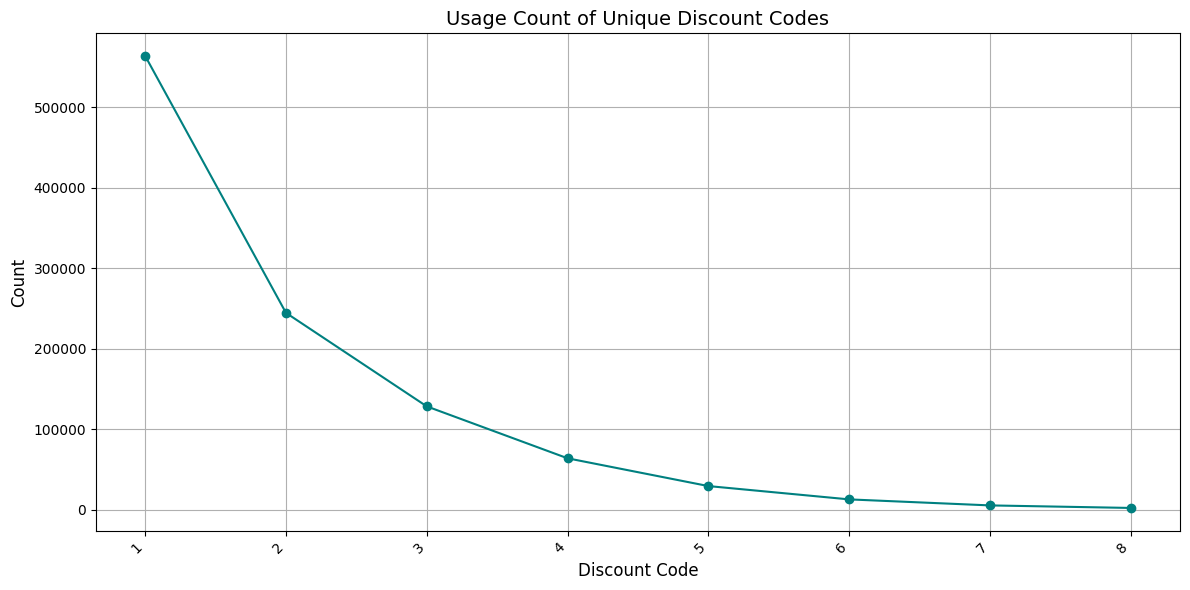

In [58]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'x' and has the required columns
X = x['unique_discount_codes']
Y = x['count']

plt.figure(figsize=(12, 6))
plt.plot(X, Y, marker='o', linestyle='-', color='teal')

plt.title('Usage Count of Unique Discount Codes', fontsize=14)
plt.xlabel('Discount Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

####  Using elbow principle we can say , 5 could be the optimal number of unique discount code  we need to show to customer on the site on one cart . 

In [114]:
# Step 1: Count unique discount codes per cart
coupon_per_cart = df.groupby('cart_id')['discount_code'].nunique().reset_index()
coupon_per_cart.columns = ['cart_id', 'unique_discount_codes']

# Step 2: Merge order placed info
merged = pd.merge(coupon_per_cart, coupon_data[['cart_id', 'cart_state']], on='cart_id', how='left')
merged = merged.drop_duplicates(subset='cart_id')

# Step 3: Group and count
summary = (
    merged.groupby(['unique_discount_codes', 'cart_state'])
    .size()
    .reset_index(name='count')
)

# Step 4: Calculate percentage within each unique_discount_codes group
summary['percentage'] = (
    summary.groupby('unique_discount_codes')['count']
    .transform(lambda x: round(100 * x / x.sum(), 2))
)

In [115]:
summary

,unique_discount_codes,cart_state,count,percentage
0,0,Created,370,75.82
1,0,orderPlaced,118,24.18
2,1,Created,294991,52.32
3,1,orderPlaced,268822,47.68
4,2,Created,119605,48.90
...,...,...,...,...
57,41,orderPlaced,1,100.00
58,45,Created,1,100.00
59,46,Created,2,100.00
60,50,Created,1,100.00


In [ ]:
new_data = summary.sort_values(by='unique_discount_codes',ascending=True).head(40)

In [151]:
new_data.columns

Index(['unique_discount_codes', 'cart_state', 'count', 'percentage'], dtype='object')

In [152]:
new_data[new_data['unique_discount_codes']<7]['count'].sum()

np.int64(1043245)

In [ ]:
new_data[new_data['unique_discount_codes']<10]['count'].sum()

np.int64(1051985)

In [ ]:
new_data[new_data['unique_discount_codes']>10]['count'].sum()

np.int64(3755)

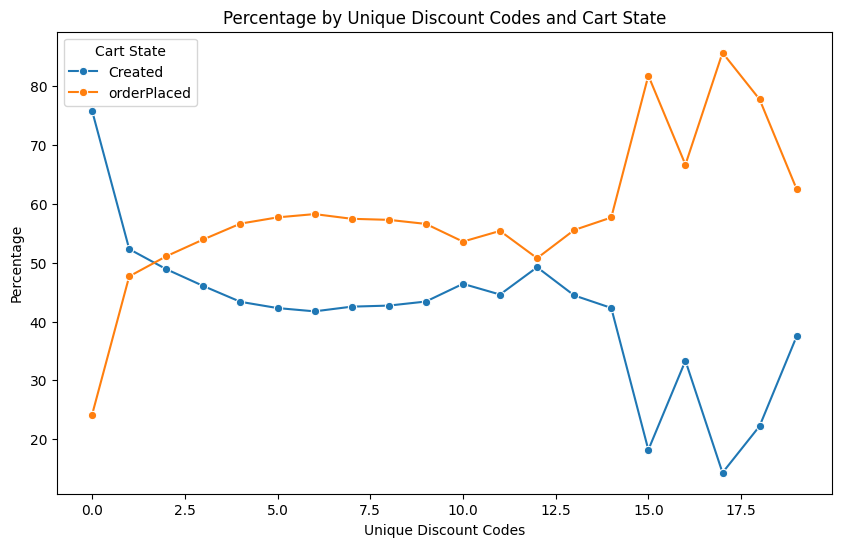

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='unique_discount_codes', y='percentage', hue='cart_state', data=new_data, marker='o')

# Customize plot
plt.title('Percentage by Unique Discount Codes and Cart State')
plt.xlabel('Unique Discount Codes')
plt.ylabel('Percentage')
plt.legend(title='Cart State')

# Show plot
plt.show()

In [80]:
summary['cart_state'].unique()

array(['Created', 'orderPlaced'], dtype=object)

In [44]:
unique_coupon_per_cart['unique_discount_codes'].count()

np.int64(1052351)

In [ ]:
unique_coupon_per_cart['unique_discount_codes'].value_counts()

unique_discount_codes
1     563813
2     244567
3     128373
4      63860
5      29348
6      12796
7       5318
8       2161
9        871
0        488
10       390
11       148
12        65
13        36
14        26
15        22
16        12
18         9
19         8
17         7
20         6
21         5
22         3
31         2
33         2
46         2
35         1
85         1
36         1
24         1
23         1
28         1
41         1
32         1
26         1
40         1
50         1
39         1
45         1
Name: count, dtype: int64

In [63]:
df['failed_reason'].value_counts()

failed_reason
You are not eligible for this discount                                                             110813
Discount code is valid for a minimum ₹699.0 cart value only                                         92040
Discount code is valid for a minimum ₹799.0 cart value only                                         57635
Discount code is valid for a minimum ₹699 cart value only                                           48551
Invalid discount code                                                                               37485
                                                                                                    ...  
Discount code is valid for a minimum Rs.599.0 cart value only                                           1
Please add minimum 749.0 items to avail this discount                                                   1
Discount code is valid for a minimum ₹750.0 cart value only                                             1
Discount code is valid for a car

In [64]:
import re

def standardize_failed_reason(reason):
    if isinstance(reason, str):
        # Match ₹<number> that does NOT already have a decimal (like ₹699, but not ₹699.0 or ₹69.09)
        return re.sub(r'₹(\d+)(?!\.\d{1,2})\b', r'₹\1.0', reason)
    return reason

df['failed_reason'] = df['failed_reason'].apply(standardize_failed_reason)

In [72]:
df['failed_reason'].value_counts().reset_index().head(15)['count'].sum()

np.int64(556565)

In [16]:
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 47 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   discount_code               object 
 2   applied_count               int64  
 3   failed                      bool   
 4   failed_reason               object 
 5   created_at                  object 
 6   updated_at                  object 
 7   cart_id                     int64  
 8   checkout_id                 float64
 9   token                       object 
 10  subtotal_price              float64
 11  total_price                 float64
 12  order_name                  object 
 13  is_payment_online           bool   
 14  verified_cart               bool   
 15  final_subtotal_price        float64
 16  final_total_price           float64
 17  cart_state                  object 
 18  final_discount              float64
 19  final_shipping       

# Coupon Success vs. Failure Rate

In [17]:
total_coupon_applied= len(coupon_data)
print(total_coupon_applied)

2841074


In [18]:
total_coupon_failed = len(coupon_data[coupon_data['failed']==True])
print(total_coupon_failed)

568802


In [19]:
# Step 1: Coupon Success vs. Failure Rate
failure_rate = round((total_coupon_failed / total_coupon_applied) * 100, 2)
print(failure_rate)

20.02


## Identify Most Common Failure Reasons

In [20]:
# Count occurrences of each failure reason
failure_reasons = coupon_data[coupon_data['failed'] == True]['failed_reason'].value_counts(normalize=True) * 100

# Convert to DataFrame
failure_reasons_df = failure_reasons.reset_index()
failure_reasons_df.columns = ['Failure Reason', 'Failure Percentage']

In [21]:
failure_reasons_df

,Failure Reason,Failure Percentage
0,You are not eligible for this discount,19.481823
1,Discount code is valid for a minimum ₹699.0 ca...,16.181378
2,Discount code is valid for a minimum ₹799.0 ca...,10.132700
3,Discount code is valid for a minimum ₹699 cart...,8.535659
4,Invalid discount code,6.590167
...,...,...
77,Discount code is valid for a minimum Rs.599.0 ...,0.000176
78,Please add minimum 749.0 items to avail this d...,0.000176
79,Discount code is valid for a minimum ₹750.0 ca...,0.000176
80,Discount code is valid for a cart having minim...,0.000176


### Top 3 coupon code used for failure reason.

In [22]:
# Step 1: Get top 3 coupon codes per failure reason
failed_coupons = coupon_data[coupon_data['failed'] == True]

# Group and count
grouped = failed_coupons.groupby(['failed_reason', 'discount_code']).size().reset_index(name='count')

# Sort and get top 3 per failure reason
top3 = grouped.sort_values(['failed_reason', 'count'], ascending=[True, False])
top3 = top3.groupby('failed_reason').head(3)

# Step 2: Aggregate top 3 coupon codes and counts as lists or strings
aggregated = top3.groupby('failed_reason').agg({
    'discount_code': lambda x: ', '.join(x),
    'count': lambda x: ', '.join(map(str, x))
}).reset_index()

aggregated.columns = ['Failure Reason', 'Top 3 Coupon Codes', 'Top 3 Coupon Counts']

# Step 3: Merge with your original failure_reasons_df
final_df = failure_reasons_df.merge(aggregated, on='Failure Reason', how='left')

# Optional: Sort by failure percentage descending
final_df = final_df.sort_values('Failure Percentage', ascending=False).reset_index(drop=True)

In [23]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [24]:
final_df.head(10)

,Failure Reason,Failure Percentage,Top 3 Coupon Codes,Top 3 Coupon Counts
0,You are not eligible for this discount,19.481823,"NEWHABIT50, FLAT20, ABFLAT50P","62518, 28343, 5463"
1,Discount code is valid for a minimum ₹699.0 ca...,16.181378,"NEWHABIT50, ZOMANAT50, NHBDAY50","66431, 11073, 5500"
2,Discount code is valid for a minimum ₹799.0 ca...,10.132700,"NEWHABIT50, HOLI50, MONSOON50","8780, 6068, 5790"
3,Discount code is valid for a minimum ₹699 cart...,8.535659,"NEWHABIT50, FRESH35, FREESPA","25790, 22189, 360"
4,Invalid discount code,6.590167,"NEWHABIT, NEWHABBIT50, NETHABIT50","1303, 1153, 650"
5,Discount code is valid for a minimum ₹599.0 ca...,6.390625,"FLAT20, FREEHANDMALAI, NUTRILOVE20","24336, 11816, 198"
6,Discount Code is not active,5.735564,"MONSOON50, NY2025, WINTER50","6054, 4953, 3947"
7,Discount code has already been used,3.952694,"NEWHABIT50, NHCREDOFS, EX3020","18254, 788, 701"
8,Discount Code is not applicable on above products,3.865669,"NEWHABIT50, FREEHANDMALAI, FRESH35","3124, 2143, 1727"
9,Discount code is valid for a minimum ₹499.0 ca...,3.686344,"FREEUBTAN, FREEHANDMALAI, FREEMALAI","12804, 7472, 583"


In [28]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'01_failure_reason.csv')
final_df.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


##  Failure Rate by Discount Type

In [29]:
coupon_data['discount_type'].value_counts()

discount_type
percentage      2271553
fixed_amount      80577
Name: count, dtype: int64

#### Customer more focused on discount on sub_total_price not on getting free product. 
#### And a business we should need to find a way where customer more focussed on our new product.

In [30]:
# Count failures by discount type
failure_by_type = coupon_data.groupby('discount_type')['failed'].mean() * 100

# Convert to DataFrame
failure_by_type_df = failure_by_type.reset_index()
failure_by_type_df.columns = ['Discount Type', 'Failure Rate (%)']


In [31]:
# Display results for complete data set
failure_by_type_df

,Discount Type,Failure Rate (%)
0,fixed_amount,9.645432
1,percentage,10.444528


## For each coupon failure rate

In [32]:
# Group by coupon code and failure reason
failure_by_coupon = coupon_data.groupby(['discount_code'])['failed'].agg(['count', 'sum'])

# Calculate failure rate
failure_by_coupon['failure_rate'] = (failure_by_coupon['sum'] / failure_by_coupon['count']) * 100

# Rename columns
failure_by_coupon = failure_by_coupon.rename(columns={'count': 'total_attempts', 'sum': 'total_failures'})

# Sort by failure rate (descending)
failure_by_coupon = failure_by_coupon.sort_values(by='failure_rate', ascending=False)

# Reset index for readability
failure_by_coupon = failure_by_coupon.reset_index()

In [33]:
total_coupon_code_used = len(failure_by_coupon)
print(total_coupon_code_used)

47317


In [34]:
failure_by_coupon

,discount_code,total_attempts,total_failures,failure_rate
0,!,12,12,100.0
1,NEW40,8,8,100.0
2,NEW150,1,1,100.0
3,NEW1HABIT50,1,1,100.0
4,NEW20,83,83,100.0
...,...,...,...,...
47312,GPAY50-G4ZDEMBSHE,1,0,0.0
47313,NHCRBOGO-GMZDQOBXHE4A,2,0,0.0
47314,NHCRBOGO-GMZDSMBRGQ4A,2,0,0.0
47315,GPAY50-G4ZDCOBXGU,2,0,0.0


In [35]:
failure_by_coupon['failure_rate'].value_counts()

failure_rate
0.000000      35159
100.000000    11589
50.000000       194
33.333333       122
25.000000        45
              ...  
44.444444         1
44.824482         1
45.141176         1
45.454545         1
24.951630         1
Name: count, Length: 138, dtype: int64

In [36]:
# Count failure reasons
failure_reasons = coupon_data[coupon_data['failed'] == True].groupby('failed_reason')['failed'].count()

# Sort by most common failure reasons
failure_reasons = failure_reasons.sort_values(ascending=False)

In [37]:
failure_reasons.sum()

np.int64(568802)

In [40]:
failure_reasons.head(15).sum()/failure_reasons.sum()

np.float64(0.9601759487484222)

#### Top 15 failure reason contributing to 96% failure coupon code.

In [48]:
type(failure_reasons)

pandas.core.series.Series

In [51]:
failure_df=failure_reasons.reset_index()

In [52]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'02_failure_reason_counts.csv')
failure_df.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


In [53]:
failure_reasons.head(15)

failed_reason
You are not eligible for this discount                         110813
Discount code is valid for a minimum ₹699.0 cart value only     92040
Discount code is valid for a minimum ₹799.0 cart value only     57635
Discount code is valid for a minimum ₹699 cart value only       48551
Invalid discount code                                           37485
Discount code is valid for a minimum ₹599.0 cart value only     36350
Discount Code is not active                                     32624
Discount code has already been used                             22483
Discount Code is not applicable on above products               21988
Discount code is valid for a minimum ₹499.0 cart value only     20968
Discount code is valid for a minimum ₹899.0 cart value only     19629
Discount code is valid for a minimum ₹499 cart value only       14064
Discount code is valid for a minimum ₹1199 cart value only      12033
Discount code is valid for a minimum ₹599 cart value only       11356
Discou

In [54]:
import pandas as pd

# Convert 'created_at' to datetime with explicit format handling
coupon_data['created_at'] = pd.to_datetime(coupon_data['created_at'], errors='coerce', utc=True)

# Extract year and month
coupon_data['year_month'] = coupon_data['created_at'].dt.to_period('M')

# Print sample data to confirm conversion
print(coupon_data[['created_at', 'year_month']].head())

                        created_at year_month
0 2024-03-31 18:30:06.797553+00:00    2024-03
1 2024-03-31 18:30:20.549031+00:00    2024-03
2 2024-03-31 18:30:34.220576+00:00    2024-03
3 2024-03-31 18:31:18.890836+00:00    2024-03
4 2024-03-31 18:31:21.579114+00:00    2024-03


In [55]:
print(coupon_data['created_at'].dtype)
print(coupon_data['created_at'].head(10))

datetime64[ns, UTC]
0   2024-03-31 18:30:06.797553+00:00
1   2024-03-31 18:30:20.549031+00:00
2   2024-03-31 18:30:34.220576+00:00
3   2024-03-31 18:31:18.890836+00:00
4   2024-03-31 18:31:21.579114+00:00
5   2024-03-31 18:31:23.255674+00:00
6   2024-03-31 18:31:38.295608+00:00
7   2024-03-31 18:31:43.392674+00:00
8   2024-03-31 18:31:51.412035+00:00
9   2024-03-31 18:31:55.386483+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [56]:
# Group by failure reason and month
failure_monthly = coupon_data[coupon_data['failed'] == True].groupby(['year_month', 'failed_reason']).size().reset_index(name='failure_count')

# Pivot the table to show failure reasons as columns (Optional, for readability)
failure_pivot = failure_monthly.pivot(index='year_month', columns='failed_reason', values='failure_count').fillna(0)

In [57]:
failure_pivot= failure_pivot.T

In [58]:
failure_pivot.columns

PeriodIndex(['2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
             '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
             '2025-03', '2025-04'],
            dtype='period[M]', name='year_month')

In [59]:
# Add a new column 'total' that sums all values row-wise
failure_pivot['total'] = failure_pivot.sum(axis=1)

In [77]:
# Sort by 'total' in descending order and get top 15 rows
top_15_failures = failure_pivot.sort_values(by='total', ascending=False).head(15)


In [78]:
top_15_failures_reindexed=top_15_failures.reset_index()

In [79]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'03_month_wise_failure_reason.csv')
top_15_failures_reindexed.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


In [82]:
import os
import matplotlib.pyplot as plt

# Set the directory path to save plots
switched_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'artifacts/visualization'))
os.makedirs(switched_path, exist_ok=True)

# Prepare the DataFrame: transpose and drop 'total'
top_15_failures_T = top_15_failures.drop(columns=['total']).T

# Convert index to formatted strings (e.g., if index is datetime or float)
top_15_failures_T.index = top_15_failures_T.index.map(str)

# Loop through each failure reason and generate individual plots
for failure_reason in top_15_failures_T.columns:
    plt.figure(figsize=(10, 5))
    
    # Extract x and y values
    x_vals = top_15_failures_T.index
    y_vals = top_15_failures_T[failure_reason].values
    
    # Plot the data
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', label=failure_reason)

    # Plot customization
    plt.xticks(rotation=45)
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Failures")
    plt.title(f"Trend for: {failure_reason}")
    plt.grid(True)
    
    # Create a safe filename
    safe_filename = f"{failure_reason.replace('/', '_').replace(' ', '_')}_trend.png"
    save_path = os.path.join(switched_path, safe_filename)

    # Save and close the figure
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

print(f"✅ All failure trend plots saved to: {switched_path}")


✅ All failure trend plots saved to: /Users/nathabit/Desktop/applied_discount_code_analysis/applied_discount_analysis/artifacts/visualization


<Figure size 1200x600 with 0 Axes>

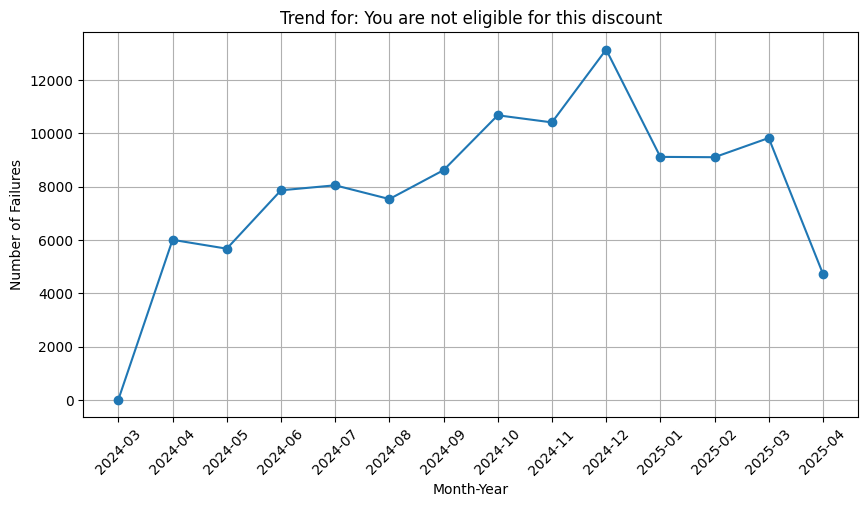

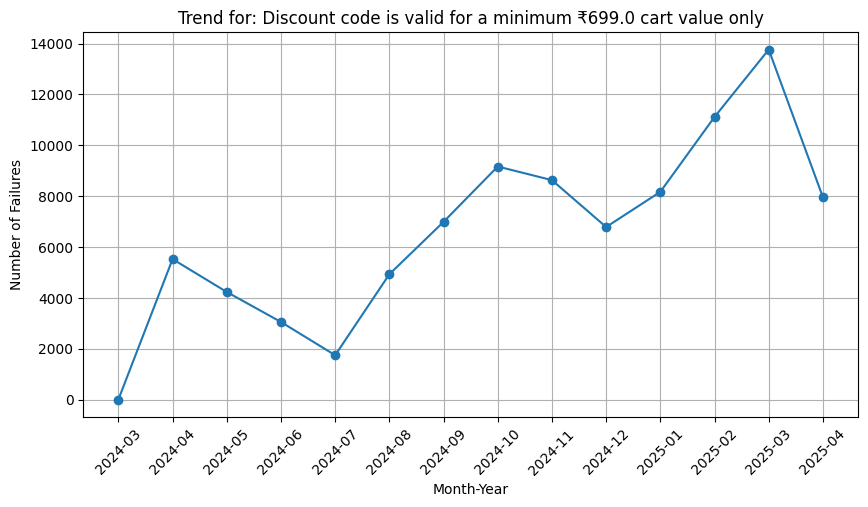

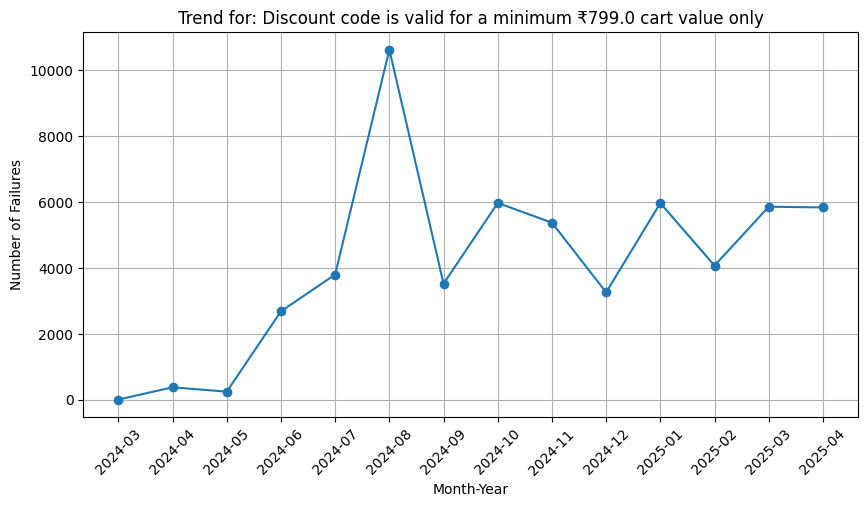

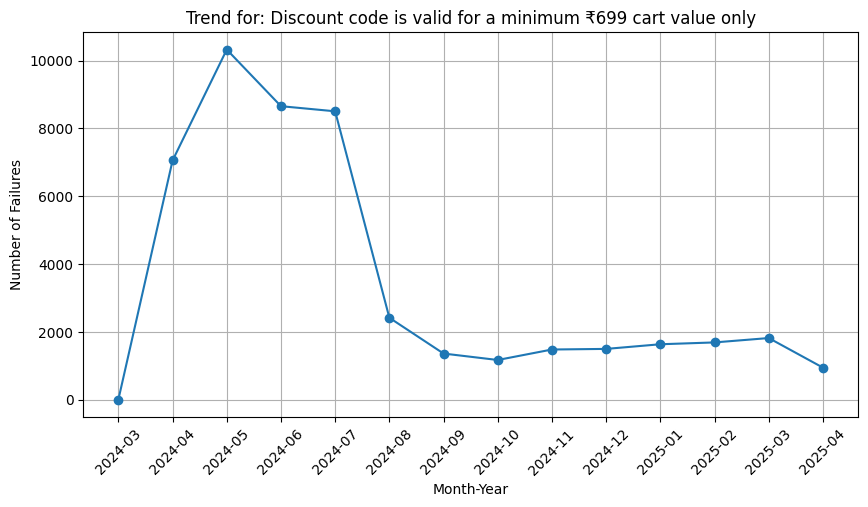

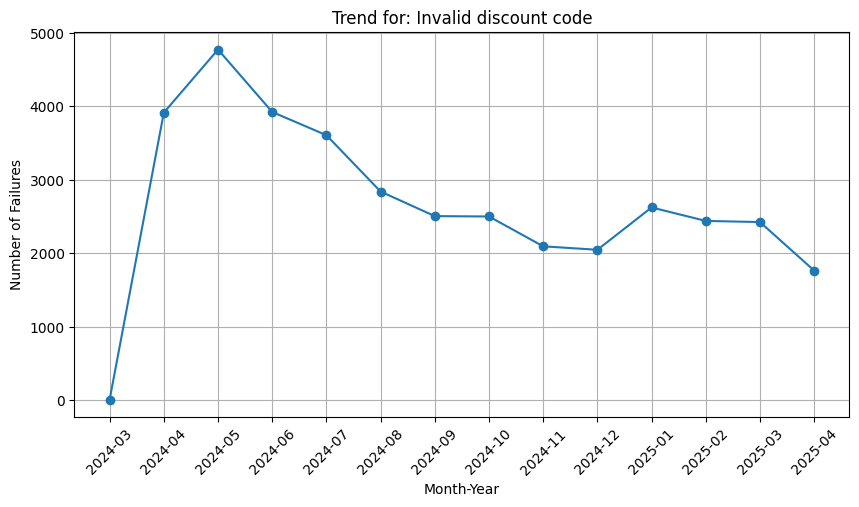

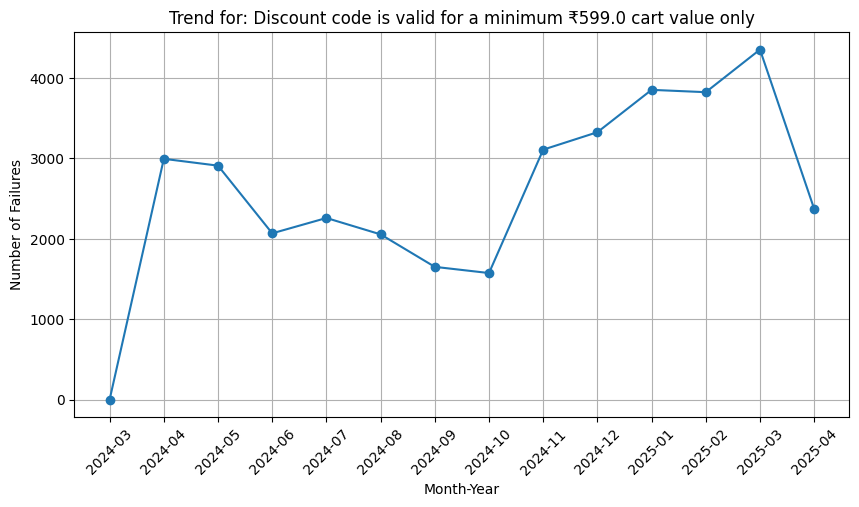

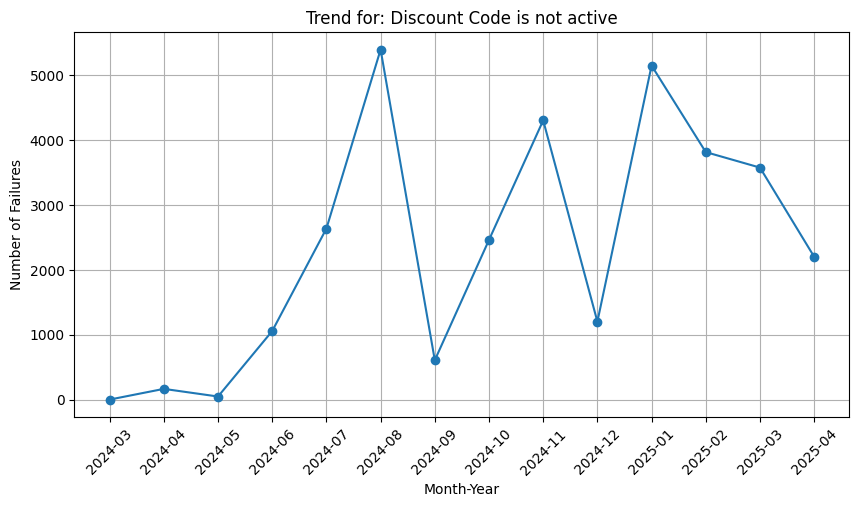

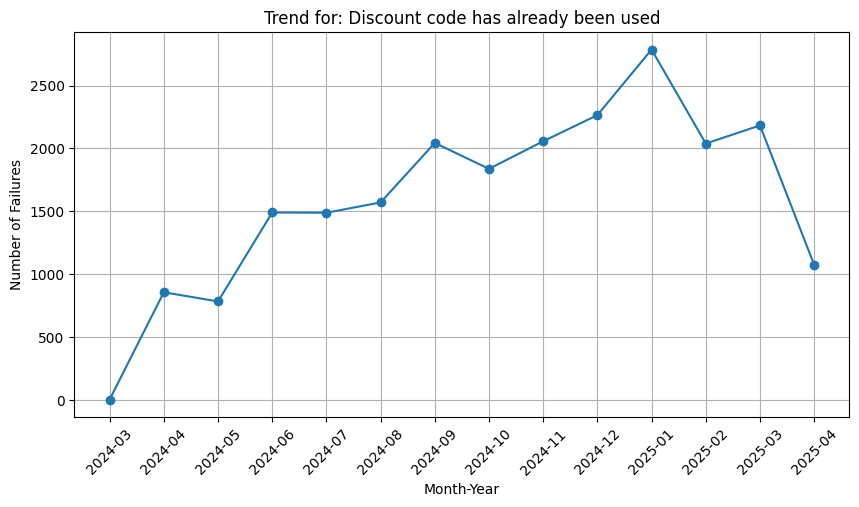

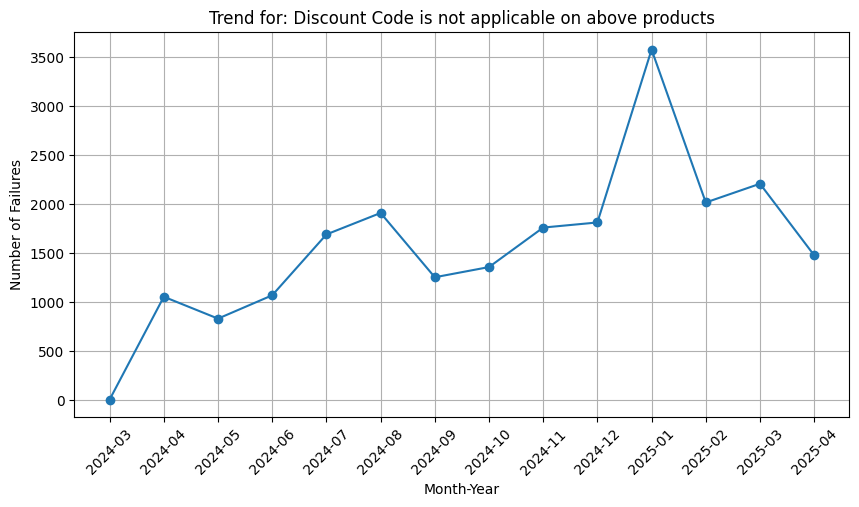

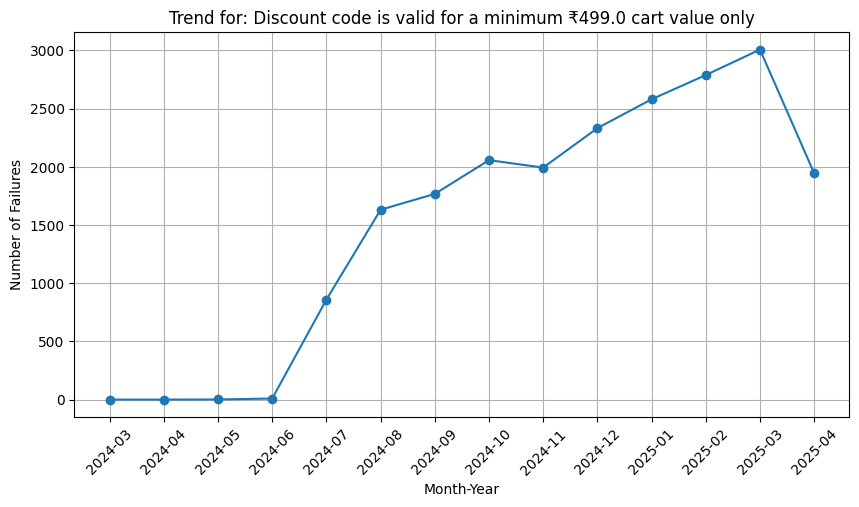

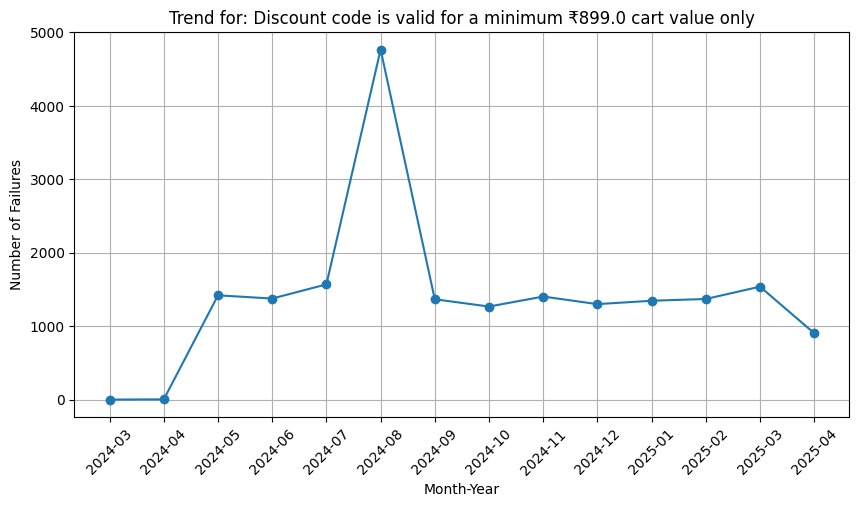

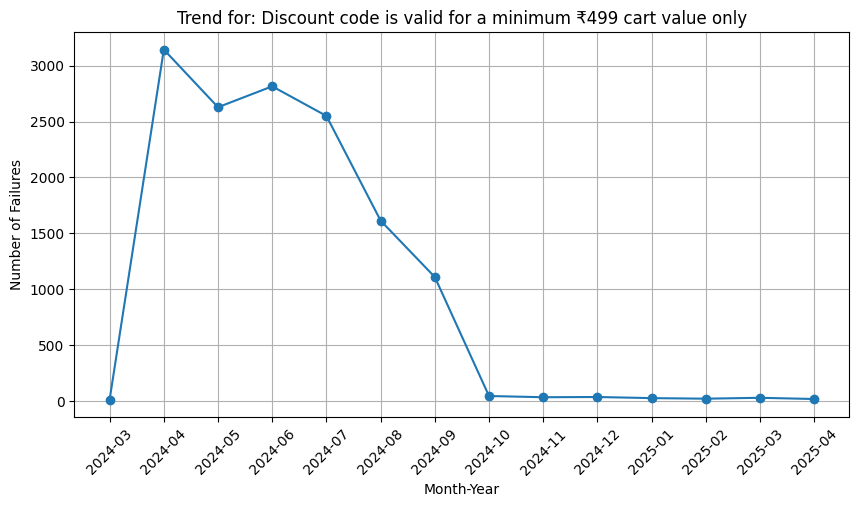

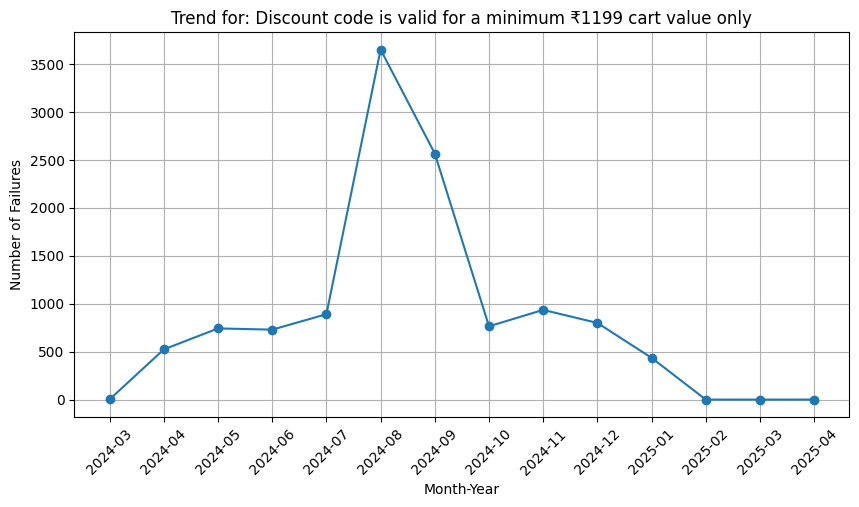

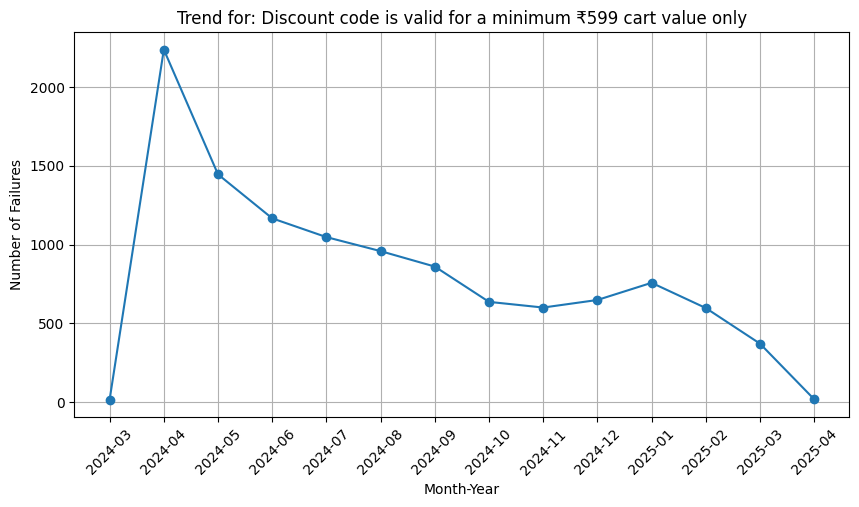

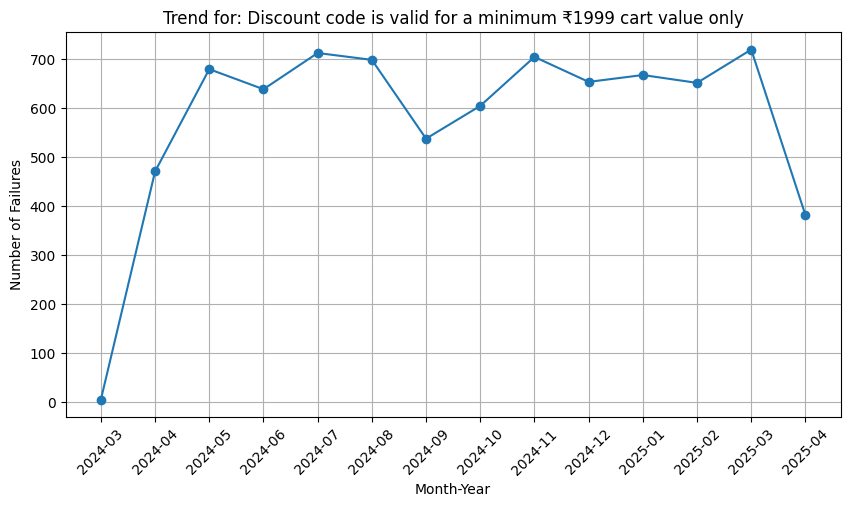

In [80]:
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))
# Transpose DataFrame to have months as rows and failure reasons as columns
top_15_failures_T = top_15_failures.drop(columns=['total']).T



# Loop through each failure reason and plot separately
for failure_reason in top_15_failures_T.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(top_15_failures_T.index.astype(str), top_15_failures_T[failure_reason], marker='o', linestyle='-')
    
    # Customizations
    plt.xticks(rotation=45)
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Failures")
    plt.title(f"Trend for: {failure_reason}")
    plt.grid(True)
    
    # Show the plot
    plt.show()


## Abondonment cart rate

In [83]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()
coupon_data['cart_state'].value_counts()
# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()
# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)
print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")

Total Carts with Coupons: 1051863
Abandoned Carts: 523035
Cart Abandonment Rate: 49.72%


In [84]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()

# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & 
                              (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()

# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)

# Calculate abandoned cart revenue
abandoned_cart_revenue = coupon_data[(coupon_data['discount_code'].notna()) & 
                                     (coupon_data['cart_state'] == 'Created')]['mrp_total'].sum()

print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")
print(f"Abandoned Cart Revenue: ₹{abandoned_cart_revenue:,.2f}")  # Formatting for better readability


Total Carts with Coupons: 1051863
Abandoned Carts: 523035
Cart Abandonment Rate: 49.72%
Abandoned Cart Revenue: ₹930,821,679.77


In [85]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app', 'year_month'],
      dtype='object')

In [89]:
# Step 1: Filter only 'Created' cart states with non-null coupon codes
abandoned_carts_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                 (coupon_data['discount_code'].notna())]

# Step 2: Sort by cart_id and created_at in descending order (latest application first)
abandoned_carts_df = abandoned_carts_df.sort_values(by=['cart_id', 'created_at'], ascending=[True, False])

# Step 3: Group by cart_id and aggregate the coupon codes into a list
cart_coupon_list = abandoned_carts_df.groupby('cart_id')['discount_code'].agg(list).reset_index()

# Step 4: Add cart_state as a column (it’ll be "Created" for all)
cart_coupon_list['cart_state'] = 'Created'

# Optional: Rename columns for clarity
cart_coupon_list.columns = ['cart_id', 'coupon_codes_applied', 'cart_state']


In [90]:
cart_coupon_list

,cart_id,coupon_codes_applied,cart_state
0,9669611,[FREEMALAI],Created
1,10852987,[FREESPA],Created
2,12305308,[NEWHABIT50],Created
3,12347809,[FREEHANDMALAI],Created
4,12380903,[FREESALT600],Created
...,...,...,...
523030,38380797,[NEWHABIT50],Created
523031,38380916,"[NEWHABIT50, FRESH35]",Created
523032,38380939,[FRESH35],Created
523033,38380966,"[NEWHABIT50, FREEHANDMALAI]",Created


In [91]:
from collections import Counter

# Step 1: Filter only carts in 'Created' state with a coupon code
abandoned_carts_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                 (coupon_data['discount_code'].notna())]

# Step 2: Sort by cart_id and created_at (latest coupon on top)
abandoned_carts_df = abandoned_carts_df.sort_values(by=['cart_id', 'created_at'], ascending=[True, False])

# Step 3: Group by cart_id and aggregate the coupon codes into a list
cart_coupon_group = abandoned_carts_df.groupby('cart_id')['discount_code'].agg(list).reset_index()

# Step 4: Create coupon code counts as dictionaries per cart_id (in descending order of frequency within list)
cart_coupon_group['coupon_code_counts'] = cart_coupon_group['discount_code'].apply(
    lambda codes: dict(Counter(codes))
)

# Step 5: Add cart_state column
cart_coupon_group['cart_state'] = 'Created'

# Optional: Rename coupon list column for clarity
cart_coupon_group.rename(columns={'discount_code': 'coupon_codes_applied'}, inplace=True)

In [92]:
cart_coupon_group

,cart_id,coupon_codes_applied,coupon_code_counts,cart_state
0,9669611,[FREEMALAI],{'FREEMALAI': 1},Created
1,10852987,[FREESPA],{'FREESPA': 1},Created
2,12305308,[NEWHABIT50],{'NEWHABIT50': 1},Created
3,12347809,[FREEHANDMALAI],{'FREEHANDMALAI': 1},Created
4,12380903,[FREESALT600],{'FREESALT600': 1},Created
...,...,...,...,...
523030,38380797,[NEWHABIT50],{'NEWHABIT50': 1},Created
523031,38380916,"[NEWHABIT50, FRESH35]","{'NEWHABIT50': 1, 'FRESH35': 1}",Created
523032,38380939,[FRESH35],{'FRESH35': 1},Created
523033,38380966,"[NEWHABIT50, FREEHANDMALAI]","{'NEWHABIT50': 1, 'FREEHANDMALAI': 1}",Created


In [93]:
# Step 1: Filter for only 'Created' carts with valid coupon codes
abandoned_coupons_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                   (coupon_data['discount_code'].notna())]

# Step 2: Group by coupon_code and count how many times each one was used
coupon_code_counts = abandoned_coupons_df['discount_code'].value_counts().reset_index()

# Step 3: Rename columns for clarity
coupon_code_counts.columns = ['coupon_code', 'count']

# Step 4: Optional - Add cart_state column
coupon_code_counts['cart_state'] = 'Created'

# Step 5: Sort by count descending
coupon_code_counts = coupon_code_counts.sort_values(by='count', ascending=False)

# Display top 10
print(coupon_code_counts.head(10))


     coupon_code   count cart_state
0     NEWHABIT50  215874    Created
1        FREESPA  122357    Created
2        FRESH35  120384    Created
3  FREEHANDMALAI  111772    Created
4      FREECOMBO   83281    Created
5      FREEUBTAN   61246    Created
6       10OFFNOW   47971    Created
7         FLAT20   41650    Created
8       NHBDAY50   28314    Created
9      MONSOON50   27740    Created


In [87]:
# Filter only carts where a discount code was applied and state is 'Created' (abandoned)
abandoned_carts_df = coupon_data[(coupon_data['discount_code'].notna()) &
                                 (coupon_data['cart_state'] == 'Created')]

# Group by cart and coupon code to count usage per cart
cart_coupon_counts = abandoned_carts_df.groupby(['cart_id', 'discount_code']) \
                                       .size() \
                                       .reset_index(name='count')

# Optional: Sort by count or cart_id for easier inspection
cart_coupon_counts = cart_coupon_counts.sort_values(by=['cart_id', 'count'], ascending=[True, False])

cart_coupon_counts.head(10)  # Sample output


,cart_id,discount_code,count
0,9669611,FREEMALAI,1
1,10852987,FREESPA,1
2,12305308,NEWHABIT50,1
3,12347809,FREEHANDMALAI,1
4,12380903,FREESALT600,1
5,13322764,ABFLAT50S,1
6,13382456,ABFLAT50S,1
7,13934317,ABFLAT50P,1
8,13944569,ABFLAT50P,1
9,14194106,ABFLAT50P,1


In [88]:
cart_coupon_counts.shape

(946992, 3)

In [148]:
x = []
for i in coupon_data.columns:
    x.append((i, coupon_data[i].isna().sum()))  # Append as a tuple

# Convert to DataFrame
null_df = pd.DataFrame(x, columns=['Column Name', 'Null Count'])

In [149]:
null_df.to_csv('nulldf.csv')

In [150]:
x = coupon_data.iloc[:, 0:34]

In [151]:
column_to_drop = ['checkout_id','recommended_discount_id','updated_at']
x.drop(columns=column_to_drop,inplace=True)

In [153]:
x.dropna(subset=['discount_code'], inplace=True)

In [155]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app',
       'year_month'],
      dtype='object')

In [156]:
with open("coupon_data_summary.txt", "w", encoding="utf-8") as f:
    for i in coupon_data.columns:
        f.write(f"{i}\n")
        f.write(f"{coupon_data[i].unique()}\n")
        f.write("-" * 50 + "\n")

In [93]:
# percentage of cart coverted into orders
y = coupon_data['cart_id'].nunique()
x = coupon_data[coupon_data['order_name'].notnull()]['cart_id'].nunique()
(x/y)*100

54.07874818973799

In [161]:
# Count unique discount codes per cart_id
coupon_counts = coupon_data.groupby('order_name')['discount_code'].nunique().reset_index()

# Rename column for clarity
coupon_counts.rename(columns={'discount_code': 'coupon_count'}, inplace=True)

# Sort by coupon_count in descending order
coupon_counts = coupon_counts.sort_values(by='coupon_count', ascending=False)

In [162]:
coupon_counts

,order_name,coupon_count
440803,NH-2614482,85
238881,NH-2321132,41
29921,NH-2021251,39
414918,NH-2577455,36
331119,NH-2459050,35
...,...,...
507108,NH-2710292,0
29277,NH-2020335,0
20137,NH-2007099,0
249905,NH-2338170,0


In [164]:
order_count = coupon_counts.groupby('coupon_count')['order_name'].count().reset_index()

# Rename column for clarity
order_count.rename(columns={'order_name': 'order_count'}, inplace=True)
# Sort by coupon_count in descending order
order_counts = order_count.sort_values(by='order_count', ascending=False)

In [166]:
coupon_data['order_name'].nunique()

528013

In [174]:
order_counts['order_count'].head(6).sum()

np.int64(523000)

In [175]:
order_counts.head(6)

,coupon_count,order_count
1,1,269745
2,2,124398
3,3,69042
4,4,35881
5,5,16691
6,6,7243


In [186]:
coupon_data.shape

(2646376, 45)

In [187]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [188]:
coupon_data.sample()

,id,discount_code,applied_count,failed,failed_reason,created_at,updated_at,cart_id,checkout_id,token,...,min_amount,is_active,suggestion_amount_window,show_only_on_checkout,background_color,image_url,show_on_new_website,recommendation_tag,show_on_only_promotion_qty,show_on_app
2028751,3241177,FREECOMBO,2,False,NaN,2025-01-08 09:31:56.063081+00:00,2025-01-08 09:31:56.264619+00:00,34351145,NaN,PpFxYdx4eQGewa8A3OFr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
len(coupon_data['cart_id'].unique())

976378

In [222]:
import pandas as pd

# Ensure 'failed' is boolean, then convert to int
coupon_data['failed'] = coupon_data['failed'].astype(int)

# Grouping data per cart_id
result = coupon_data.groupby('cart_id').agg(
    total_coupons_applied=('discount_code', 'count'),
    total_coupons_failed=('failed', 'sum'),
    failed_coupon_position=('failed', lambda x: [i+1 for i, v in enumerate(x, start=1) if v == 1]),
    order_placed=('order_name', lambda x: 'Yes' if x.notna().any() else 'No'),
    revenue_generated=('final_total_price', 'sum'),
    discount_applied=('discount_amount', 'sum')
).reset_index()

In [223]:
result

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,0.0,0.0
1,10852987,1,0,[],No,0.0,0.0
2,12207885,1,1,[2],Yes,0.0,0.0
3,12305308,1,1,[2],No,0.0,0.0
4,12347809,1,0,[],No,0.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [207]:
len(result['cart_id'].unique())

976378

In [217]:
no_orders = result[result['order_placed']=='No']

In [221]:
no_orders

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,882.0,0.0
1,10852987,1,0,[],No,947.0,0.0
3,12305308,1,1,[2],No,773.0,0.0
4,12347809,1,0,[],No,330.0,0.0
5,12380903,1,0,[],No,964.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [211]:
result['failed_coupon_position'].value_counts()

failed_coupon_position
[]                       586296
[2]                      225245
[2, 3]                    40772
[3]                       36335
[4]                       16100
                          ...  
[7, 8, 12]                    1
[5, 6, 8, 13]                 1
[2, 7, 8, 11, 13]             1
[4, 7, 9, 12, 13, 15]         1
[8, 9, 10, 12]                1
Name: count, Length: 1311, dtype: int64